In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
x = np.random.normal(0, 1, (10000, 3))
x.shape

(10000, 3)

In [264]:
def obj(x):
    return 2.0*np.power(x[0], 2)+x[1]*x[2]-x[0]*np.power(x[1], 2)

In [265]:
y = np.expand_dims(np.apply_along_axis(obj, axis=1, arr=x), axis=1)
y.shape

(10000, 1)

In [266]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [267]:
def loss(e):
    return np.sum(e)/e.shape[0]

def error(y, y_hat):
    return np.power(y-y_hat, 2)/2

def grad_error(y, y_hat):
    return (y_hat - y)/y_hat.shape[0]

In [268]:
def grad(x, y, w1, w2, w3):
    # Forward
    o1 = np.matmul(x, w1)  # N, 8
    a1 = sigmoid(o1)       # N, 8
    o2 = np.matmul(a1, w2) # N, 5
    a2 = sigmoid(o2)       # N, 5
    o3 = np.matmul(a2, w3) # N, 1
    y_hat = o3
    # Backprop
    e = error(y, y_hat)
    l = loss(e)
    d3 = grad_e = grad_error(y, y_hat)         # N, 1
    grad_3 = np.matmul(a2.T, d3)               # 5, 1
    d2 = grad_sigmoid(o2)*np.matmul(d3, w3.T)  # N, 5   # IMPORTANT: no matmul for sigmoid, elementwise-prod
    grad_2 = np.matmul(a1.T, d2)               # 8, 5
    d1 = grad_sigmoid(o1)*np.matmul(d2, w2.T)  # N, 8
    grad_1 = np.matmul(x.T, d1)                # 3, 8
    return l, grad_1, grad_2, grad_3

In [269]:
w1_ = np.random.normal(0, 1, (3, 8))
w2_ = np.random.normal(0, 1, (8, 5))
w3_ = np.random.normal(0, 1, (5, 1))

In [281]:
def train(x, y, w1_, w2_, w3_, epochs = 10000, eta = 0.05):
    w1 = w1_.copy()
    w2 = w2_.copy()
    w3 = w3_.copy()
    history = []
    for i in range(epochs):
        sample = np.random.choice(x.shape[0], size=100, replace=False)
        batch_x = x[sample, :]
        batch_y = y[sample, :]
        l, grad_1, grad_2, grad_3 = grad(batch_x, batch_y, w1, w2, w3)
        w1 -= eta*grad_1
        w2 -= eta*grad_2
        w3 -= eta*grad_3
        if i % 500 == 0:
            print("Loss:", l)
        history.append(l)
    return history, w1, w2, w3

In [282]:
history, w1, w2, w3 = train(x, y, w1_, w2_, w3_)

Loss: 6.352353465007552
Loss: 5.578976927540855
Loss: 2.8371304582514143
Loss: 1.5653673972738478
Loss: 1.3345589157771176
Loss: 1.2715612092430377
Loss: 1.5118157425944616
Loss: 1.7018478399843868
Loss: 0.8836631189248513
Loss: 0.2534682420394521
Loss: 0.5237677017045946
Loss: 0.7839719031247877
Loss: 0.985262460356179
Loss: 4.034956386753003
Loss: 0.23598214515999083
Loss: 2.0058874590755233
Loss: 0.5090800494305171
Loss: 0.8427440630649221
Loss: 0.25689436427274837
Loss: 0.18551783414235007


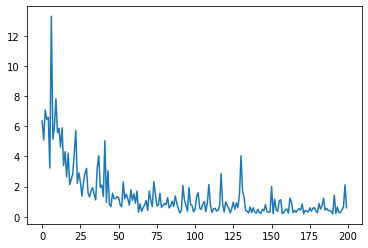

In [298]:
plt.plot(history[::50])

In [300]:
def predict(x, w1, w2, w3):
    o1 = np.matmul(x, w1)  # 100, 8
    a1 = sigmoid(o1)       # 100, 8
    o2 = np.matmul(a1, w2) # 100, 5
    a2 = sigmoid(o2)       # 100, 5
    o3 = np.matmul(a2, w3) # 100, 1
    y_hat = o3
    return y_hat

In [304]:
x_test = np.random.normal(0, 1, (100, 3))
y_test = np.expand_dims(np.apply_along_axis(obj, axis=1, arr=x_test), axis=1)

In [305]:
y_hat = predict(x_test, w1, w2, w3)

In [307]:
np.mean(y_test-y_hat)

-0.2599275877002038

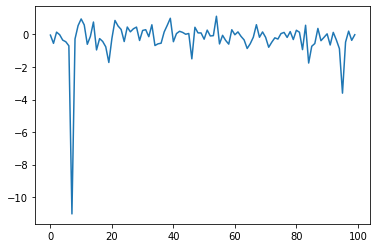

In [309]:
plt.plot(y_test-y_hat)